# YAPAY ÖĞRENMENİN TEMELLERİ DERSİ PROJE KODU

## SELİN ALP - EZGİ GÜL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np #çok boyutlu diziler ve matematiksel işlemler için kullanılırmış
import pandas as pd #veri analizi ve işlemesi için kullanılırmış
import matplotlib.pyplot as plt #grafik oluşturmak için kullanılırmış

In [ ]:
veri_seti= pd.read_csv("dataset_Facebook.csv",sep=';') #burada sep parametresi ile ayırarak daha okunabilir bir tablo görüntüsü elde ettik

veri_seti = veri_seti.copy() #değişiklik yaparken hata verdiği için kopyasını oluşturup onun üstünden işlem yaptık

veri_seti.head() #kontrol amaçlı ilk başını head ile yazdırdık

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
#belirlenilen sütunları alıp yeni bir veri seti oluşturmak istediğimiz için
#öncelikle tüm sütunları yazdırıp(isim yazarken hata yapmamak için)
#veri_seti'nin istediğimiz sütunlarıylala yeni halini oluşturduk

print(veri_seti.columns) #veri setindeki sütunları kontrol ettik

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')


In [ ]:
veri_seti=veri_seti[['Type','Category', 'Page total likes', 'Post Month',
'Post Hour', 'Post Weekday', 'Paid', 'Total Interactions']] #içinden belirli kategorilerle yeni tablo oluşturduk
veri_seti.head()

,Type,Category,Page total likes,Post Month,Post Hour,Post Weekday,Paid,Total Interactions
0,Photo,2,139441,12,3,4,0.0,100
1,Status,2,139441,12,10,3,0.0,164
2,Photo,3,139441,12,3,3,0.0,80
3,Photo,2,139441,12,10,2,1.0,1777
4,Photo,2,139441,12,3,2,0.0,393


In [ ]:
#daha doğru bir sonuç elde edebilmek için hocamız type sütunun nümerik değişkenlere dönüştürülmesini istemişti.
#bu yüzden her özelliğe aşağıda bir numara verdik

veri_seti['Type'] = veri_seti['Type'].map({'Photo': 1, 'Video': 2, 'Status': 3, 'Link': 4})

In [ ]:
veri_seti.head()

,Type,Category,Page total likes,Post Month,Post Hour,Post Weekday,Paid,Total Interactions
0,1,2,139441,12,3,4,0.0,100
1,3,2,139441,12,10,3,0.0,164
2,1,3,139441,12,3,3,0.0,80
3,1,2,139441,12,10,2,1.0,1777
4,1,2,139441,12,3,2,0.0,393


In [ ]:
#bu tabloda bazı null değerleri olabilir ve bu değerler doğrusal regresyon kodumuzun doğru çalışmasını engelleyebilir
#bu yüzden bunu kontrol etmek istedik ve yeni veri setimizdeki boş sütunları kontrol edip,
# bir listeye atıp bu listeyi yazdırdık. Sonuca göre gerçekten de paid sütununda boş değer varmış bunu görmüş olduk

veri_seti.isnull().values.any() #veri setinde boşluk olup olmadığını kontrol ettik

True

In [ ]:
df = pd.DataFrame(veri_seti)

bos_sutunlar = df.columns[df.isnull().any()].tolist()
print(bos_sutunlar)

['Paid']


In [ ]:
ortalama_paid = veri_seti['Paid'].mean() #sütunun ortalamasını aldık
veri_seti['Paid'].fillna(ortalama_paid, inplace = True) #boş olan yerlere bu ortalama değeri yerleştiriyoruz

In [ ]:
veri_seti['Paid'] #499. değere baktığımızda görüyoruz ki aslında orası nullmuş ve ortalama değeri olan0.278557 değerini oraya yazdırmışız.

0      0.000000
1      0.000000
2      0.000000
3      1.000000
4      0.000000
         ...   
495    0.000000
496    0.000000
497    0.000000
498    0.000000
499    0.278557
Name: Paid, Length: 500, dtype: float64

### Doğrusal Regresyon

Öncelikle fonksiyonunu yazacağız. Bir class oluşturuyoruz ve içerisine gerekli fonksiyonları da katarak gerekli hesaplamaları yapıyoruz. Buradaki matematiksel hesaplamaları raporumuza yazdık

In [ ]:
X = veri_seti[['Type', 'Category', 'Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid']]
Y = veri_seti['Total Interactions']

In [ ]:
class DogrusalRegresyon():

    #parametreleri yazdık
    def __init__(self, ogrenme_puani, iterasyon):
        self.ogrenme_puani = ogrenme_puani
        self.iterasyon = iterasyon

    def fit(self, X, Y):

        self.m, self.n = X.shape
        #ağırlık ve bias değerleri
        self.w = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        #gradyant descent kısmı
        for i in range(self.iterasyon):
            self.agirlikGuncelleme()

    def agirlikGuncelleme(self):
        Y_tahmin = self.tahmin(self.X)


        dw = -(self.X.T).dot(self.Y - Y_tahmin)/self.m #gradyant hesapladık

        db = -np.sum(self.Y - Y_tahmin)/self.m


        self.w = self.w - self.ogrenme_puani * dw # ağırlıkları güncelledik bu gradyantlara göre
        self.b = self.b - self.ogrenme_puani * db

    def tahmin(self, X):
        return X.dot(self.w) + self.b

    def agirliklar(self):
        print('Ağırlıklar:')
        print(self.w)
        print()

        print('Bias:', self.b)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = veri_seti[['Type', 'Category', 'Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid']]
Y = veri_seti['Total Interactions']




X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40) #verileri bölme işlemini yaptık

scaler = StandardScaler() #burada verilere scaler uyguladık. aksi takdirde dizi boyutlarından dolayı hata veriyordu.
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler.transform(Y_test.values.reshape(-1, 1))

model = DogrusalRegresyon(ogrenme_puani=0.03, iterasyon=10000) #iterasyon sayısı ne kadar artarsa o kadar yüksek doğruluk oranı gelebilir, burada model adında doğrusal regresyon sınıfımızı oluşturduk
model.fit(x_train_scaled, Y_train_scaled) #fit fonksiyonunu çağırdık.







In [ ]:
#Ağırlıkları yazdırdık:
model.agirliklar()

Ağırlıklar:
[[-0.03067891]
 [ 0.12062563]
 [ 0.20360959]
 [-0.16266206]
 [-0.00662493]
 [-0.07104124]
 [ 0.10176929]]

Bias: -7.074341112911512e-17


Şimdi diğer özelliklerini yazdıralım:

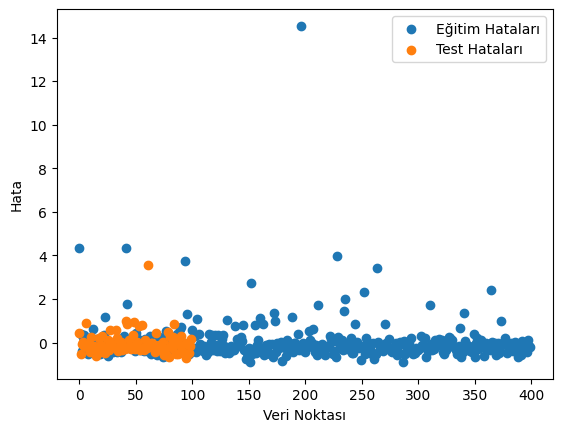

---------------------------------------------------------------------------


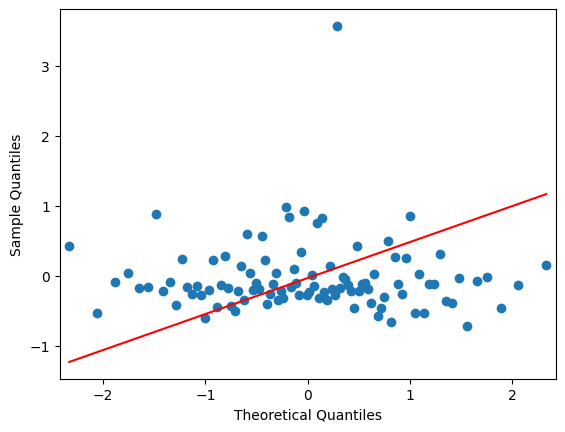

MSE: 0.2664303756996539
SSE: 26.643037569965387
Ağırlıklar:
[[-0.03067891]
 [ 0.12062563]
 [ 0.20360959]
 [-0.16266206]
 [-0.00662493]
 [-0.07104124]
 [ 0.10176929]]

Bias: -7.074341112911512e-17


In [ ]:


import statsmodels.api as sm #grafik için gerekli bir kütüphane
import matplotlib.pyplot as plt #aynı şekilde yine grafik için gerekli


testTahmin = model.tahmin(x_test_scaled) #test tahmini

testHata = Y_test_scaled - testTahmin #gerçek ve tahmin arasındaki farkı hesapladık

egitimTahmin = model.tahmin(x_train_scaled) #eğitim tahmini

egitimHata = Y_train_scaled - egitimTahmin #gerçek ve tahmin arasındaki farkı hesapladık

#Tablo Kısmı:

plt.scatter(np.arange(len(egitimHata)), egitimHata, label='Eğitim Hataları')
plt.scatter(np.arange(len(testHata)), testHata, label='Test Hataları')

plt.xlabel('Veri Noktası')
plt.ylabel('Hata')

plt.legend()
plt.show()

sonuc = Y_test_scaled - testTahmin
sm.qqplot(sonuc, line='s')

print("---------------------------------------------------------------------------")

plt.show()

#MSE
mse = np.mean((testHata)**2)

print('MSE:', mse)

#SSE
sse = np.sum((testHata)**2)

print('SSE:', sse)

model.agirliklar()